In [2]:
import numpy as np #vector library
import pandas as pd #library for working with data\tables
import matplotlib.pyplot as plt #library for working with data \ tables

In [3]:
from datetime import datetime

In [4]:
money = pd.read_csv("JPY.csv", sep=";")

In [5]:
money.head(5)

,nominal,data,curs,cdx
0,100,01/01/2016,"60,5806",Японская иена
1,100,12/01/2016,"64,5812",Японская иена
2,100,13/01/2016,"65,1950",Японская иена
3,100,14/01/2016,"64,6294",Японская иена
4,100,15/01/2016,"64,9353",Японская иена


In [6]:
target_columns = ["data", "curs"]

In [7]:
print (target_columns)
print (target_columns[0])

['data', 'curs']
data


In [8]:
money = money [target_columns]

In [9]:
money.head(5)

,data,curs
0,01/01/2016,"60,5806"
1,12/01/2016,"64,5812"
2,13/01/2016,"65,1950"
3,14/01/2016,"64,6294"
4,15/01/2016,"64,9353"


In [12]:
real_columns = ["date", "value"]

In [13]:
money.columns = real_columns

In [14]:
money.head(5)

,date,value
0,01/01/2016,"60,5806"
1,12/01/2016,"64,5812"
2,13/01/2016,"65,1950"
3,14/01/2016,"64,6294"
4,15/01/2016,"64,9353"


In [15]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 2 columns):
date     881 non-null object
value    881 non-null object
dtypes: object(2)
memory usage: 13.8+ KB


In [16]:
def convert_money(string):
    return float(string.replace(",", "."))

In [17]:
convert_money("123,123")

123.123

In [18]:
def convert_date(string):
    return datetime.strptime(string, "%d/%m/%Y")

In [19]:
convert_date("21/09/2019"), type (convert_date("21/09/2019"))

(datetime.datetime(2019, 9, 21, 0, 0), datetime.datetime)

In [20]:
money["date"] = money["date"].apply(convert_date)
money["value"] = money["value"].apply(convert_money)

In [21]:
money.head(5)

,date,value
0,2016-01-01,60.5806
1,2016-01-12,64.5812
2,2016-01-13,65.1950
3,2016-01-14,64.6294
4,2016-01-15,64.9353


In [22]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 2 columns):
date     881 non-null datetime64[ns]
value    881 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.8 KB


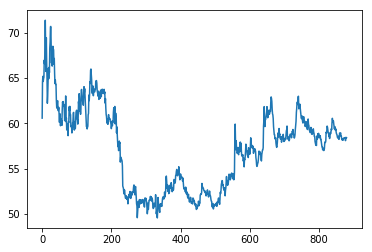

In [23]:
plt.plot (money["value"])

In [34]:
#f(t) = a + b * t -> liniear model
#f(t) = a + b * t + c * t ^ 2 -> quadratic model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
money["id"] = range(len(money))

In [26]:
money.head(5)

,date,value,id
0,2016-01-01,60.5806,0
1,2016-01-12,64.5812,1
2,2016-01-13,65.1950,2
3,2016-01-14,64.6294,3
4,2016-01-15,64.9353,4


In [27]:
len(money)

881

In [28]:
end = 150

In [36]:
X = money [["id"]][:end] # <start>:<end> start from  <start> до <end> not including <end>
y = money["value"][:end]

In [38]:
reg = LinearRegression().fit(X, y)

In [39]:
y_pred = reg.predict(X)

In [40]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

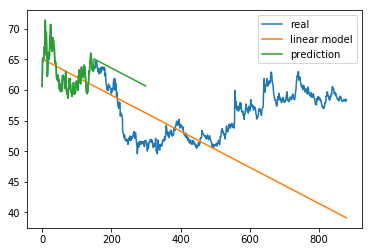

In [48]:
plt.plot(money["value"], label="real")
plt.plot(reg.predict(money[["id"]]), label="linear model")
plt.plot(list(y) + list (y_pred), label = "prediction")
plt.legend()

In [43]:
#list (y) + list (y_pred)  #this line has been commited not to produce too much code